# __Google Cloud Vision API - Test Drive__

#### _Reference: https://cloud.google.com/vision, https://cloud.google.com/vision/docs/libraries#installing_the_client_library_

#### Possible Use Cases Include: 1. Product Search, 2. Automatic Labelling of Images for Parametric Search, 3. Classifying Documents, 4. Image Search, etc.

In [1]:
# Install the Google Cloud Vision library that allows us to make request to the Google Cloud Vision API
# !pip install google-cloud-vision

In [2]:
# Import the libraries
import os
from google.cloud import vision_v1
from google.cloud.vision_v1 import types

In [3]:
# Google Vision API key
os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = 'unique-sentinel-320212-91cb79ab2383.json'

In [4]:
# Instantiate the client
client = vision_v1.ImageAnnotatorClient()

In [5]:
# Set image to be analyzed
image = types.Image()
image.source.image_uri = 'https://www.indiewire.com/wp-content/uploads/2016/08/20140216-131646.jpg'

#### _Here's the image analyzed_
<img src='https://www.indiewire.com/wp-content/uploads/2016/08/20140216-131646.jpg' width='500'>

In [6]:
# Label Detection

response_labels = client.label_detection(image=image)
print('Labels (and confidence score):');print('='*30)

for label in response_labels.label_annotations:
    print(label.description, '(%.0f%%)' % (label.score*100.))

Labels (and confidence score):
Smile (96%)
Hairstyle (95%)
Facial expression (93%)
Musician (91%)
Bow tie (88%)
Flash photography (88%)
Coat (88%)
Music artist (87%)
Entertainment (86%)
Music (84%)


In [7]:
# Face detection

response_faces = client.face_detection(image=image)

# Names of likelihood from google.cloud.vision.enums
likelihood_name = ('UNKNOWN', 'VERY_UNLIKELY', 'UNLIKELY', 'POSSIBLE',
                       'LIKELY', 'VERY_LIKELY')
    
print('Faces (and confidence score)');print('='*30)

for face in response_faces.face_annotations:
    print('anger: {}'.format(likelihood_name[face.anger_likelihood]))
    print('joy: {}'.format(likelihood_name[face.joy_likelihood]))
    print('surprise: {}'.format(likelihood_name[face.surprise_likelihood]))

    vertices = (['({},{})'.format(vertex.x, vertex.y)
                for vertex in face.bounding_poly.vertices])

    print('face bounds: {}'.format(','.join(vertices)))

Faces (and confidence score)
anger: VERY_UNLIKELY
joy: VERY_LIKELY
surprise: VERY_UNLIKELY
face bounds: (547,52),(843,52),(843,396),(547,396)


### _When you're done with the API, you might want to disable it: https://cloud.google.com/service-usage/docs/enable-disable#disabling_

## __Instructions on setting up Google Cloud Project and Cloud Vision API below:__

## __1. Setting up Cloud Vision API__

### A. Create your Google Cloud Project if you don't have it yet
### B. Within your Google Cloud Project Home, click on "Go to API overview"
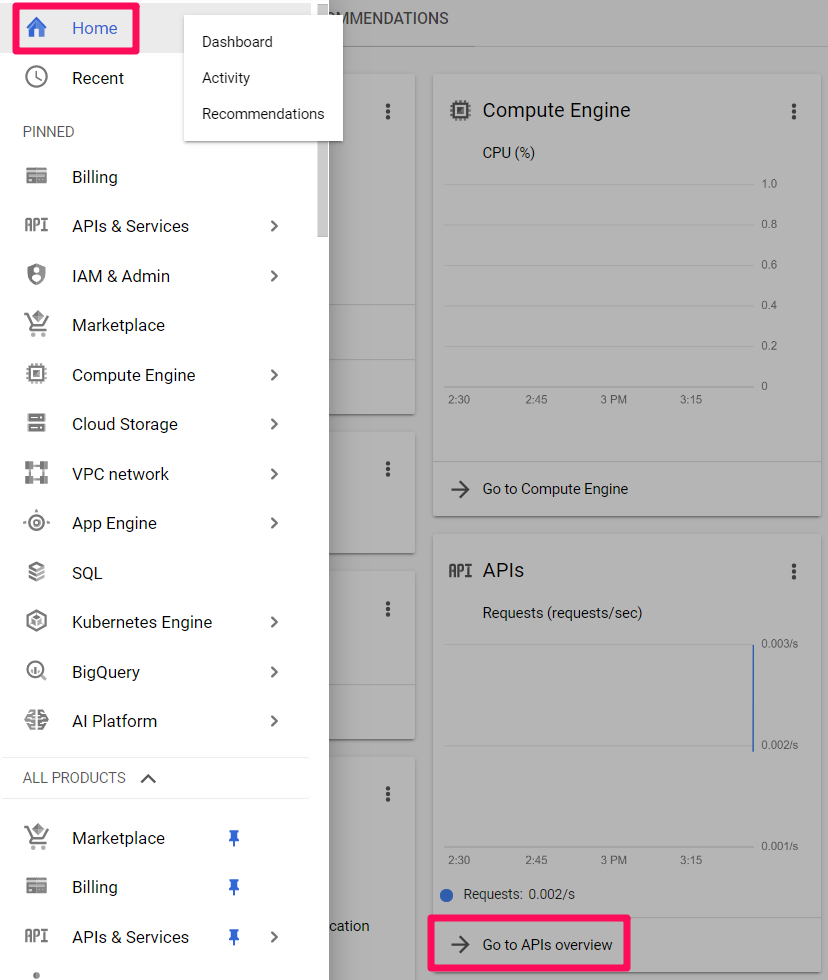

### C. Enable APIs and Services
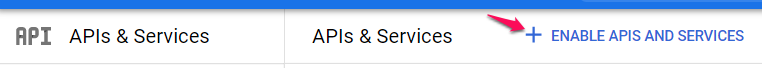
### D. Search for and Select Cloud Vision API
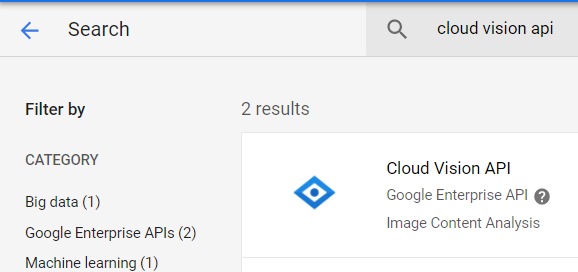

### E. Enable it

## __2. Create Cloud Vision API Credentials__

### A. Select create credentials
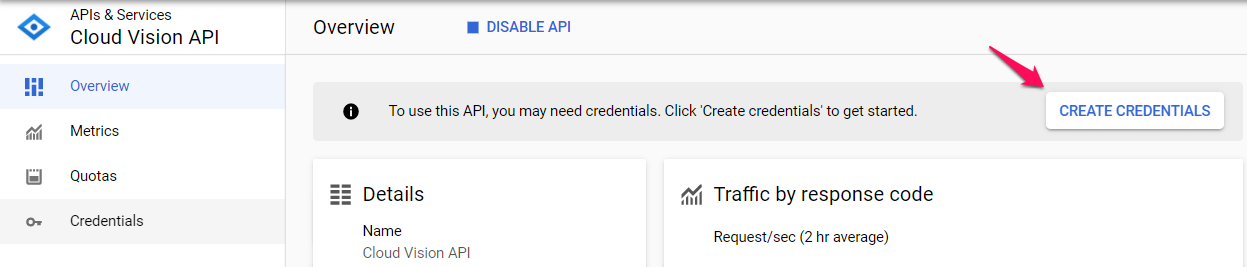
### B. Choose Cloud Vision API > Application Data _(since we are creating a service account)_ > No
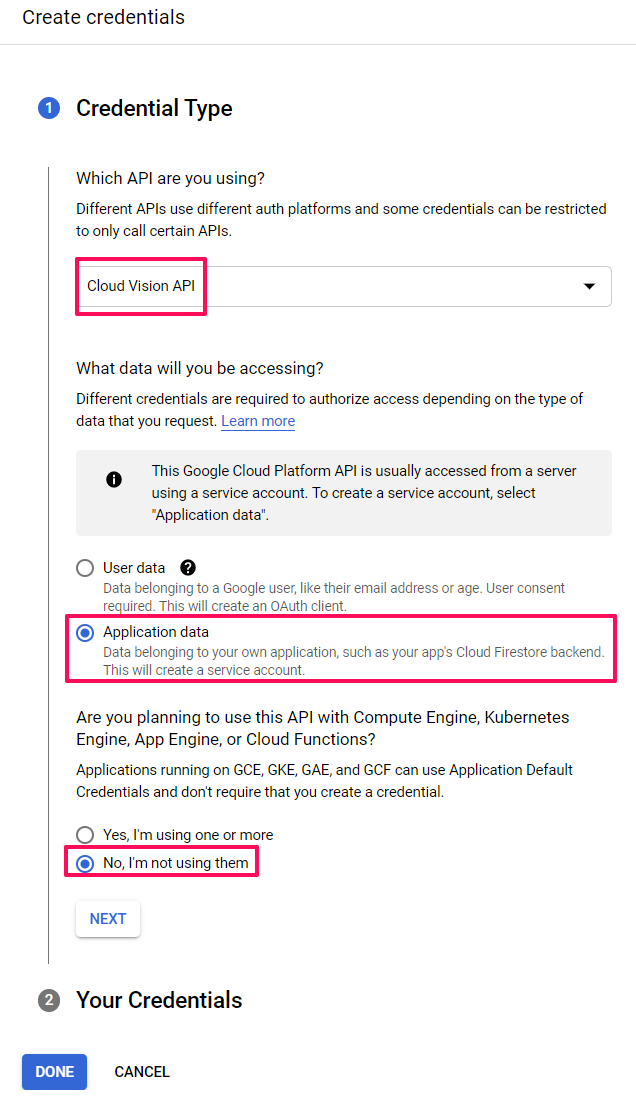

### C. Provide your service account details _(you can leave out the optional parts)_ and click done
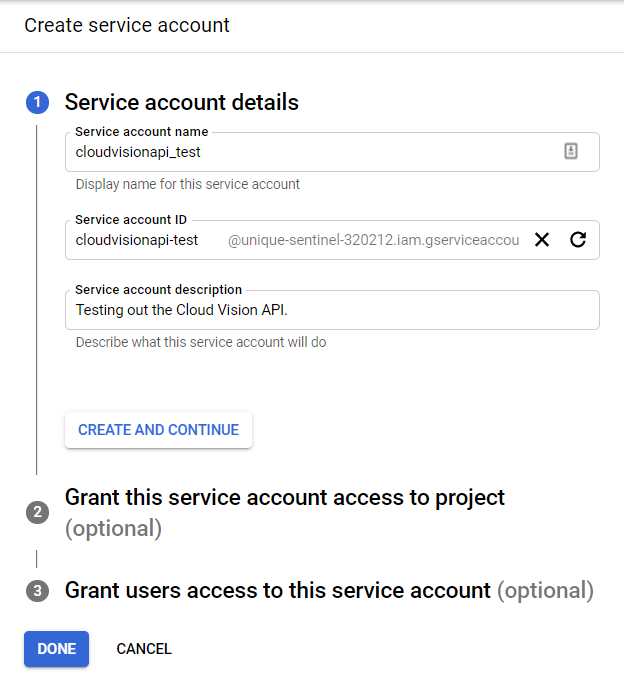

#### D. Select the Service Account you created
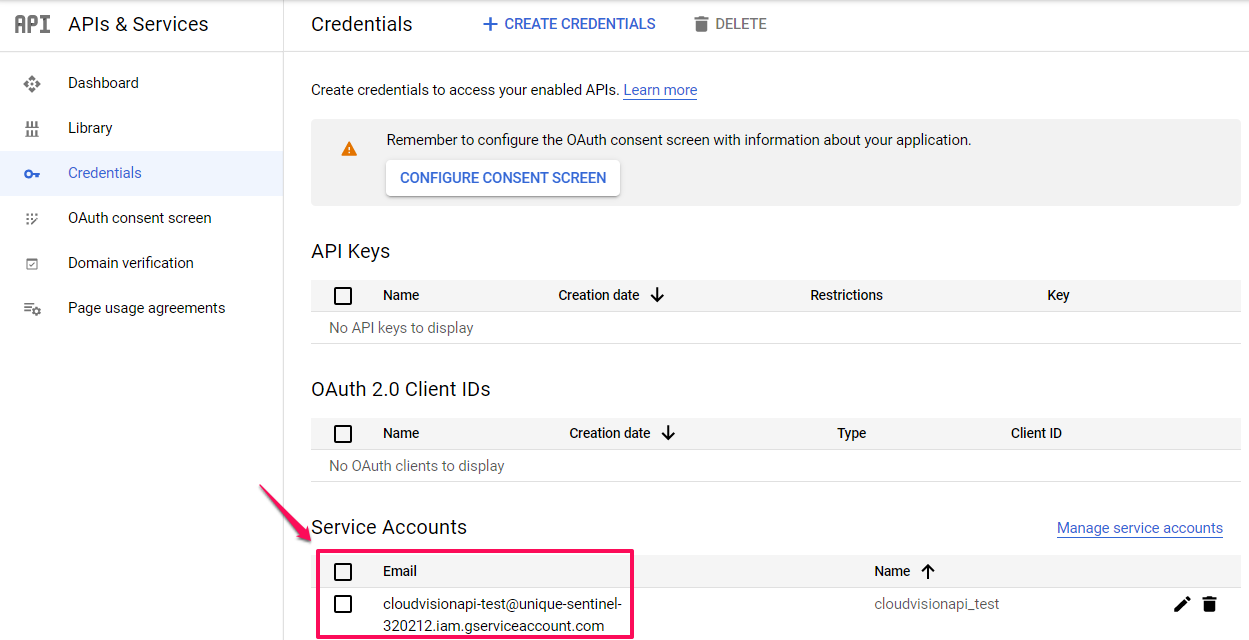

### E. Select Keys > Add Key > Create New Key > JSON and a JSON file will be downloaded. Put this JSON file in the same directory as your Python script
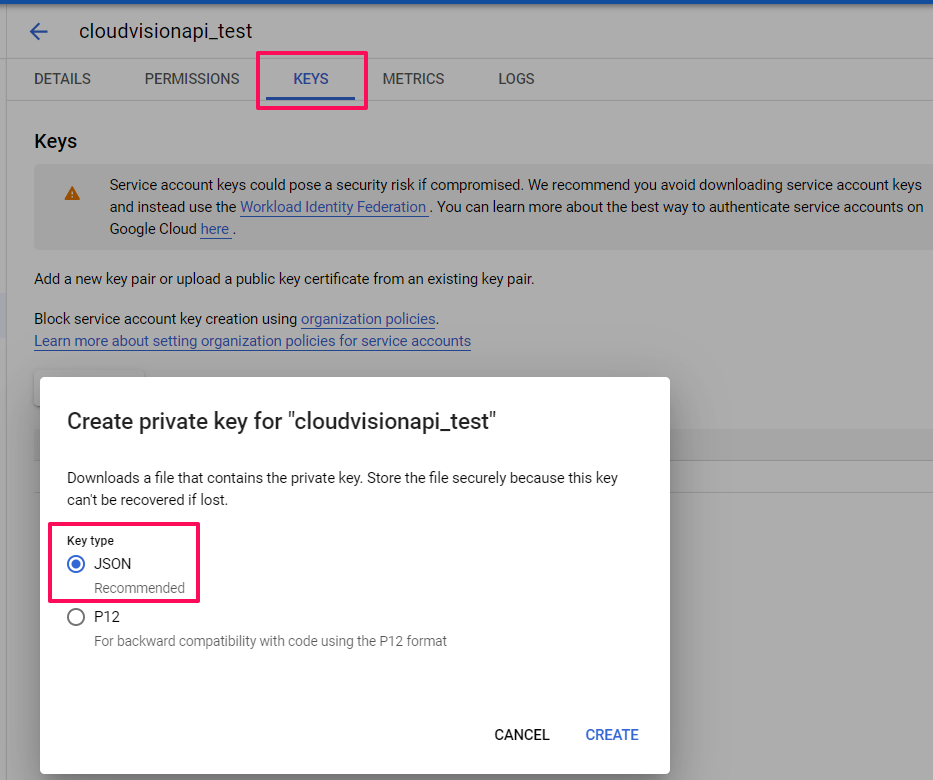

### The End.
### Thank You!